In [ ]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems/")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix");

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Gaussian Elimination</strong><br>
    <strong style="height:100px;color:darkred;font-size:30px;">CR and CMR Decompositions</strong>
</div>

# 1. Example

Besides the PLU decomposition, Gauss-Jordan Elimination yields another decomposition of a given matrix $A$.

$\qquad$ To see it, let's look at an example of a matrix $A$ augmented by the identity matrix.<br>
$\qquad$ The observations will readily generalize.

## 1.1 Reduction of a Matrix to Row Echelon Form

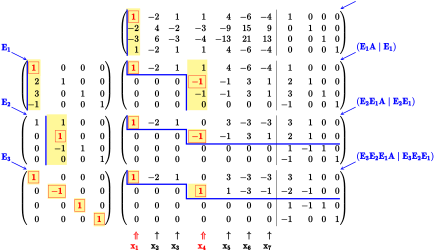

In [2]:
Random.seed!(268)
M=4;N=7;r=2

A,X,B = gen_gj_pb(M,N,r; maxint=3, pivot_in_first_col=true, num_rhs=0,has_zeros=false)
pb = ShowGe{Rational{Int}}( A,  Matrix(1I(M)); tmp_dir="../tmp")
ref!(pb, gj=true)
U = pb.matrices[end][end][:,1:N]
E = pb.matrices[end][end][:,N+1:end]

show_layout!(pb; array_names=["E", ["A","I"]])

## 1.2 The first rank(A) Columns of $\mathbf{E^{-1}}$ are the Pivot Columns of $\mathbf{A}$

<br>
Observe that $E = E_3 E_2 E_1 = \left(
\begin{array}{4r}
3 & 1 & 0 & 0 \\
-2 & -1 & 0 & 0 \\
1 & -1 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
\end{array}
\right)\qquad \Leftrightarrow \qquad
E^{-1} = \left(
\begin{array}{4r}
1 & 1 & 0 & 0 \\
-2 & -3 & 0 & 0 \\
-3 & -4 & 1 & 0 \\
1 & 1 & 0 & 1 \\
\end{array}
\right)
$
<br><br>
$E$ is the invertible matrix that reduces $A$ to it's reduced row echelon form $U$:
$\qquad E A = U \Leftrightarrow A = E^{-1} U$

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:12pt;\">The product E⁻¹ U = A: the columns of I copy in the first and second columns of E⁻¹ respectively</p>\n</div>")

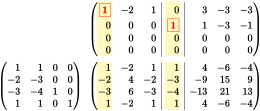

In [3]:
# display A = E⁻¹ U
E⁻¹ = inv(E)
matrices = [[ :None, Int.(U)], [Int.(E⁻¹), A]]
h,_=nM.ge(matrices, Nrhs=[1,3],
             pivot_list=[ [(0,1), [(0,0), (1,3)] ]  ],
             bg_for_entries = [[0,1, [[(0,0),(3,0)],[(0,3),(3,3)]], "yellow!25", 1],
                               [1,1, [[(0,0),(3,0)],[(0,3),(3,3)]], "yellow!25", 1],
                              ],
             variable_summary = [true,false,false,true,false,false,false],
             tmp_dir="../tmp"
)
pr( "The product E⁻¹ U = A: the columns of I copy in the first and second columns of E⁻¹ respectively", sz=12, color="blue")
h

Since the pivot columns of $U$ are successive columns of $I$, they copy successive columns of $E^{-1}$ into the product $A$<br>
so that **the first rank$\mathbf{(A)}$ columns of $\mathbf{E^{-1}}$ are the pivot columns of $\mathbf{A}$!**

In [4]:
@show E⁻¹[:,1:pb.rank] == A[:,pb.pivot_cols];

E⁻¹[:, 1:pb.rank] == A[:, pb.pivot_cols] = true


## 1.3 An $\ \mathbf{ A = C R}\ $ Decomposition

Let us look again at $A = E^{-1} U$: we observe that the zero rows of $U$ (and thus the corresponding rows of $E^{-1}$ do not enter in the product.

Eliminating them, we are left with reduced matrices:

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:12pt;\">The product E⁻¹ U = A: the columns of I copy in the first and second columns of E⁻¹ respectively</p>\n</div>")

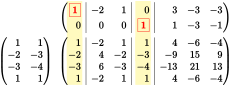

A == C * R = true


In [5]:
# display A = C R
E⁻¹ = inv(E)
C   = A[:,pb.pivot_cols]
R   = U[1:pb.rank,:]
matrices = [[ :None, Int.(R)], [Int.(C), A]]
h,_=nM.ge(matrices, Nrhs=[2,1,3],
             pivot_list=[ [(0,1), [(0,0), (1,3)] ]  ],
             bg_for_entries = [[0,1, [[(0,0),(3,0)],[(0,3),(3,3)]], "yellow!25", 1],
                               [1,1, [[(0,0),(3,0)],[(0,3),(3,3)]], "yellow!25", 1],
                              ],
             #variable_summary = [True,True,False],
             tmp_dir="../tmp"
)
pr( "The product E⁻¹ U = A: the columns of I copy in the first and second columns of E⁻¹ respectively", sz=12, color="blue")
display(h)
@show  A == C * R;

We see that $A$ is the product of two matrices $A = C R$, where
* $C$ is the submatrix consisting of **the pivot columns of $\mathbf{A}$**
* $R$ is the submatrix of **the pivot rows of $\mathbf{U}$**, where $U$ is the reduced row echelon form of $A$.

# 2. Some Observations

## 2.1 A CR Decomposition Reveals Bases for the Column and Row Spaces of a Matrix

From the study of subspaces, we see that
* The columns of $C$ form a **basis for the column space** $\mathscr{C}(A)$.
* The rows of $R$ form a **basis for the row space** $\mathscr{R}(A)$.

## 2.2 A CR Decomposition is Not Unique

We could have chosen different pivot columns (e.g., the columns chosen using full pivoting).

Using the above example, we could have chosen say, the first and last column of $A$.<br>

**Remarks:**
* we do not really need the $E$ matrix, and thus can dispense with augmenting the matrix by the identity.
* we do not need to restart from $A$, but rather can use the matrix $U$ as a starting point.

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:12pt;\">Compute the row echelon form of A using the first and last columns of A</p>\n</div>")

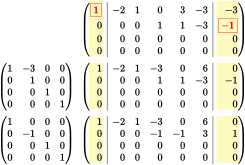

In [6]:
E₁ = [ 1 -3 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
E₂ = [ 1 0 0 0; 0 -1 0 0; 0 0 1 0; 0 0 0 1]
matrices=[[:None, Int.(U)], [E₁, E₁*Int.(U)], [E₂, E₂*E₁*Int.(U)]]

h,_=nM.ge(matrices, Nrhs=[5,1],
             pivot_list=[ [(0,1), [(0,0), (1,6)] ]  ],
             bg_for_entries = [[0,1, [[(0,0),(3,0)],[(0,6),(3,6)]], "yellow!25", 1],
                               [1,1, [[(0,0),(3,0)],[(0,6),(3,6)]], "yellow!25", 1],
                               [2,1, [[(0,0),(3,0)],[(0,6),(3,6)]], "yellow!25", 1],
                              ],
             tmp_dir="../tmp"
)
pr( "Compute the row echelon form of A using the first and last columns of A", sz=12, color="blue")
h

Thus $A = C R$, where $C$ are the first and last columns of $A$, and $R$ is the submatrix with non-zero rows in the reduced row echelon form:

In [7]:
C = A[:,[1,end]]
R = matrices[end][end][1:2,:]
display(latexify([latex(raw"A = C R = "), C', R']'))
@show A == C*R;

L"\begin{equation}
\left[
\begin{array}{ccc}
A = C R =  & \left[
\begin{array}{cc}
1 & -4 \\
-2 & 9 \\
-3 & 13 \\
1 & -4 \\
\end{array}
\right] & \left[
\begin{array}{ccccccc}
1 & -2 & 1 & -3 & 0 & 6 & 0 \\
0 & 0 & 0 & -1 & -1 & 3 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

A == C * R = true


## 2.3 A CMR Decomposition

The $C$ matrix is guaranteed to have a pivot in every column. We can therefore rewrite it as $C = \tilde{C} M$,<br>
where $\tilde{C}$ contains an identity matrix, and $M$ is an invertible submatix of $A$.

To make this simple, we will work with $C^t$, augment it by I, and pick the pivot cols to find this matrix and its inverse.

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:12pt;\">Augmenting Cᵗ by I and reducing to RREF</p>\n</div>")

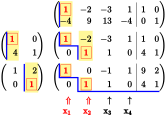

In [8]:
pbCt = ShowGe{Rational{Int}}( Matrix(C'),  Matrix(1I(pb.rank)); tmp_dir="../tmp")
ref!(pbCt, gj=true)
pr("Augmenting Cᵗ by I and reducing to RREF", sz=12, color="blue")
show_layout!(pbCt)

Using the first two columns of $C^t$ and thus the first two rows of $C$, we see that

In [9]:
M̃ = pbCt.matrices[end][end][:,size(C,1)+1:end]'
M̃⁻¹ = C[1:2,:]
C̃ = C*M̃
@show A == C̃ * M̃⁻¹ * R;

A == C̃ * M̃⁻¹ * R = true


In [10]:
pr("Renaming the matrices, we have A = C M R:", sz=12, color="blue")
latexify([latex("A = C M R = "), C̃',  M̃⁻¹', R']')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:12pt;\">Renaming the matrices, we have</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{cccc}
A = C M R =  & \left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
-1 & 1 \\
1 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cc}
1 & -4 \\
-2 & 9 \\
\end{array}
\right] & \left[
\begin{array}{ccccccc}
1 & -2 & 1 & -3 & 0 & 6 & 0 \\
0 & 0 & 0 & -1 & -1 & 3 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

**Remarks:**
* The $M$ matrix is an invertible submatrix of $A$
* The $C$ and $R$ matrices contain $I$
* $C M$ is a submatrix of $A$. Its columns are a basis for the column space $\mathscr{C}(A)$
* $M R$ is a submatrix of $A$. Its rows are a basis for the row space $\mathscr{R}(A)$

In [14]:
latexify([latex("A ="), A', latex("C M ="), (C̃*M̃⁻¹)', latex( "M R ="), (M̃⁻¹*R)']')

L"\begin{equation}
\left[
\begin{array}{cccccc}
A = & \left[
\begin{array}{ccccccc}
1 & -2 & 1 & 1 & 4 & -6 & -4 \\
-2 & 4 & -2 & -3 & -9 & 15 & 9 \\
-3 & 6 & -3 & -4 & -13 & 21 & 13 \\
1 & -2 & 1 & 1 & 4 & -6 & -4 \\
\end{array}
\right] & C M = & \left[
\begin{array}{cc}
1 & -4 \\
-2 & 9 \\
-3 & 13 \\
1 & -4 \\
\end{array}
\right] & M R = & \left[
\begin{array}{ccccccc}
1 & -2 & 1 & 1 & 4 & -6 & -4 \\
-2 & 4 & -2 & -3 & -9 & 15 & 9 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"